In [2]:
import os
import sys
sys.path.insert(0,'..')
import argparse
import configparser
import pickle as pkl
import sys
import warnings
from argparse import ArgumentParser
from copy import deepcopy
from os import environ
from os.path import join as oj
import numpy as np
import torch
import torch.utils.data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
import training.my_eval as my_eval
import training.data_loader as dl 
from training.loss_functions import nll_loss
from utils import create_json_status, initialize_model
from config import data_config

In [3]:
params = {
            'start': 10,
            'stop' : 30,
            'batch_size' : 128,
            'num_epochs' : 3000,
            'sequence_length' : 100,
            'seed' : 42,
            'hidden_size_lstm' : -1,
            'hidden_size' : 32,
            'use_augment' : 1,
            'train_percentage' : 0.5,
            'use_covariates' : True,
            'use_cycle_counter' : 1,
        }

In [4]:
data_path = data_config["abs_data_path"]
data_dict = dl.load_data_all_channels(data_path)
x, y, c, var = dl.get_capacity_input(
        data_dict,
        start_cycle=params['start'],
        stop_cycle=params['sequence_length']
    )

dict_keys(['Ic', 'Id', 'Qc', 'Qd', 'Vc', 'Vd', 'td', 'tc'])


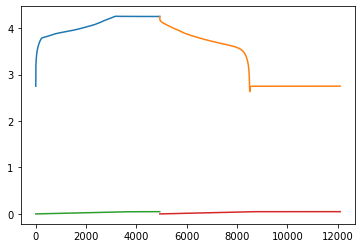

In [7]:
import matplotlib.pyplot as plt 
cycle_i = str(100)
print(data_dict['cell10']['cycles'][cycle_i].keys())
Qd = data_dict['cell10']['cycles'][cycle_i]['Qd']
Qc = data_dict['cell10']['cycles'][cycle_i]['Qc']
Ic = data_dict['cell10']['cycles'][cycle_i]['Vc']
Id = data_dict['cell10']['cycles'][cycle_i]['Vd']
plt.plot(Ic)
plt.plot(np.arange(len(Ic),len(Ic)+len(Id)), Id)

plt.plot(Qc / 3000)
plt.plot(np.arange(len(Ic),len(Ic)+len(Id)), Qd/3000)
